# OK Cupid Portfolio Project

## Project Scope

#### Goals:
We would like to utilize machine learning to predict the users pet prefernces using known features from the OK Cupid dataset. The pet preferences is an important part of someone choosing their ideal partner, so it is important to know.

#### Data:
We are using the OK Cupid dataset provided by codecademy

#### Analysis:
We will complete exploratory analysis of the data, in order to clean it and adjust any details so it can be suitable for use in our machine learning algorithms. Then we will preprocess the data into training and testing sets.

#### Evaluation:
Using a chosen algorithm, we will train a model and use evaluation metrics to test the performance of our model.

## 1 : Loading Data

In [59]:
import pandas as pd
import numpy as np


profiles = pd.read_csv("profiles.csv")

profiles.head()


,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [247]:
profiles.columns
print(profiles.shape)
print(profiles.pets.value_counts())

(59946, 35)
pets
likes dogs and likes cats          14814
likes dogs                          7224
likes dogs and has cats             4313
has dogs                            4134
has dogs and likes cats             2333
likes dogs and dislikes cats        2029
has dogs and has cats               1474
has cats                            1406
likes cats                          1063
has dogs and dislikes cats           552
dislikes dogs and likes cats         240
dislikes dogs and dislikes cats      196
dislikes cats                        122
dislikes dogs and has cats            81
dislikes dogs                         44
Name: count, dtype: int64


We have 31 columns of information which include :

- **age** continous variable of persons age
- **body_type** categorical variable of body type of user
- **diet** categorical variable of users diet
- **drinks** categorical variable of users drinking habits
- **drugs** categorical variable of users drug use habits
- **education** categorical variable of users education
- **ethnicity** categorical variable of users ethnicity
- **height** continuous variable of users height
- **income** continous variable of users income
- **job** categorical variable of users job
- **last_online** date variable of last login time
- **location** categorical variable of users location
- **offspring** categorical variable of users preference for children
- **orientation** categorical variable of users sexual orienrtation
- **pets** categorical variable of users pet preferences
- **religion** categorical variable of users religion
- **sex** binary variable of users sex
- **sign** categorical variable of users star sign
- **smokes** categorical variable of users smoking habits
- **speaks** categorical variable of languages the user speaks
- **status** categorical variable of users relationship status

- **essays** multiple essay answers to questions about themselves



## 2. Exploring Data

In [42]:
print(f"Number of categories in pets column : {profiles.pets.nunique()}")
print(f"Unique answers {profiles.pets.unique()}")


Number of categories in pets column : 15
Unique answers ['likes dogs and likes cats' 'has cats' 'likes cats' nan
 'has dogs and likes cats' 'likes dogs and has cats'
 'likes dogs and dislikes cats' 'has dogs' 'has dogs and dislikes cats'
 'likes dogs' 'has dogs and has cats' 'dislikes dogs and has cats'
 'dislikes dogs and dislikes cats' 'dislikes cats'
 'dislikes dogs and likes cats' 'dislikes dogs']


We can see that the pets column includes information about their likings of dogs and cats.
There are 15 unique categories which have these distinct features:

- likes dogs
- has dogs
- dislikes dogs
- likes cats
- has cats
- dislikes cats

I will split the columns into seperate ones for cats and dogs, and encode them for use in a machine learning model.

In [360]:
profiles['pets_dogs'] = np.nan
profiles['pets_cats'] = np.nan

for i in range(len(profiles)):
    string = profiles.pets.iloc[i]
    if isinstance(string,str):
        if 'and' in string:
            dog_pref = string.split('and')[0].strip()
            cat_pref = string.split('and')[1].strip()
            profiles.loc[i, 'pets_dogs'] = dog_pref
            profiles.loc[i, 'pets_cats'] = cat_pref
        elif 'dogs' in string:
            profiles.loc[i, 'pets_dogs'] = string.strip()
            profiles.loc[i, 'pets_cats'] = np.nan
        elif 'cats' in string:
            profiles.loc[i, 'pets_cats'] = string.strip()
            profiles.loc[i, 'pets_dogs'] = np.nan



    
    
    




/var/folders/0b/fyr8x8g975z0ntrp1gb4s78h0000gp/T/ipykernel_61966/244461360.py:10: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'likes dogs' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  profiles.loc[i, 'pets_dogs'] = dog_pref
/var/folders/0b/fyr8x8g975z0ntrp1gb4s78h0000gp/T/ipykernel_61966/244461360.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'likes cats' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  profiles.loc[i, 'pets_cats'] = cat_pref


## Lets explore the distribution of some of the variables

### Discrete Variables

#### Sex

<Axes: xlabel='count', ylabel='sex'>

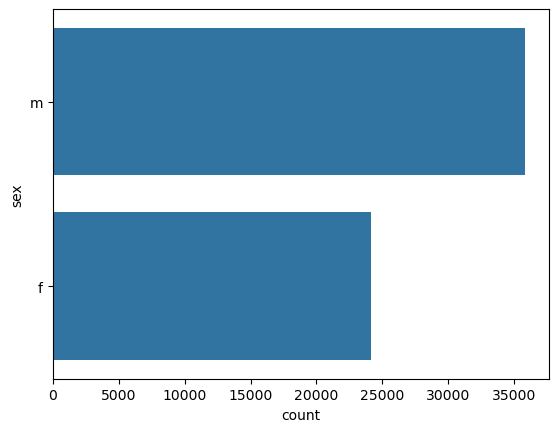

In [301]:
sns.countplot(y = 'sex', data = profiles)

As we can see there are more males in the dataset, around 35,000 compared to 24000 females.

#### Job

<Axes: xlabel='count', ylabel='job'>

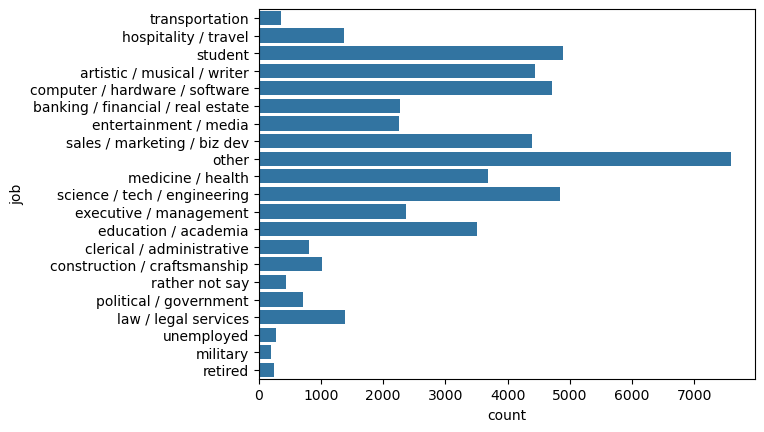

In [304]:
sns.countplot(y = 'job', data = profiles)

Fairly widespread of occupancies, many in marketing, science or are students.

#### Orientation

<Axes: xlabel='count', ylabel='orientation'>

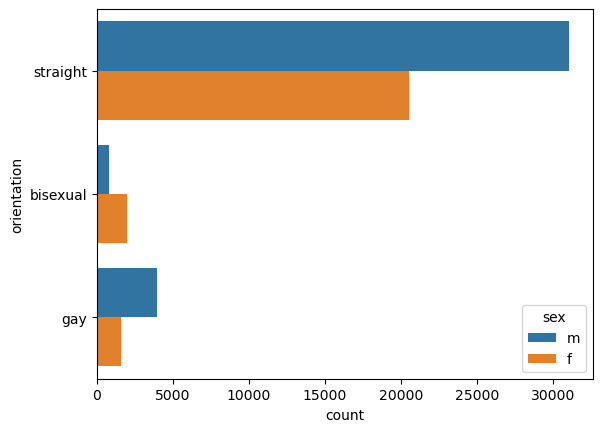

In [307]:
sns.countplot(y = 'orientation', data = profiles, hue = 'sex')

Majority of the people in the dataset are straight, with most of the people who are bisexual are female, and most of the people who are gay being male.

#### Religion

<Axes: xlabel='count', ylabel='religion'>

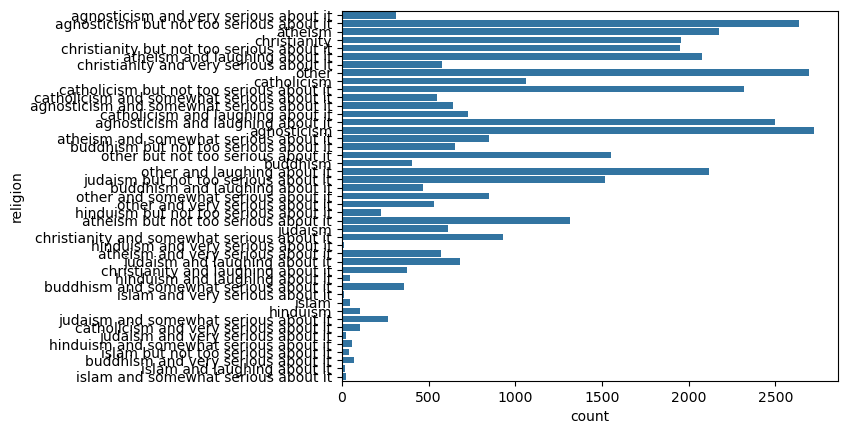

In [310]:
sns.countplot(y = 'religion', data = profiles)

Let's clean the religion column to get a better idea of the distribution.

<Axes: xlabel='count', ylabel='religion_cleaned'>

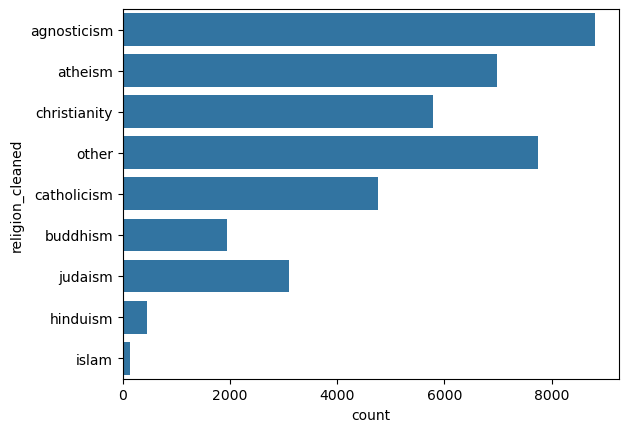

In [312]:
profiles['religion_cleaned'] = profiles.religion.str.split().str.get(0)
sns.countplot(y = 'religion_cleaned',  data = profiles)

Now we can see that most people were agnostic, atheists or christian.

#### Drinking

<Axes: xlabel='count', ylabel='drinks'>

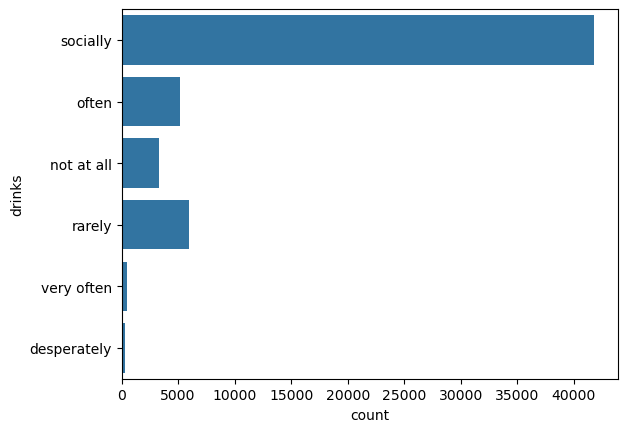

In [315]:
sns.countplot(y = 'drinks', data = profiles)

Most people drink socially, followed by rarely and often.

#### Sign

<Axes: xlabel='count', ylabel='sign'>

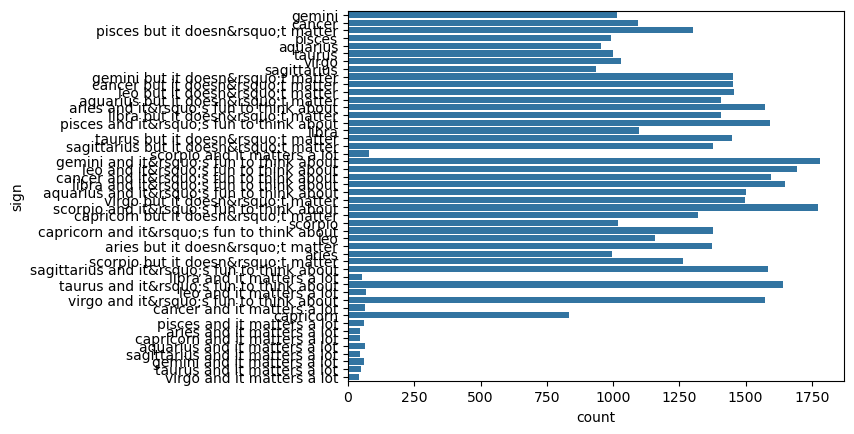

In [318]:
sns.countplot(y = 'sign', data = profiles)

Once again, we need to clean the column to get a better look at it.

<Axes: xlabel='count', ylabel='sign_cleaned'>

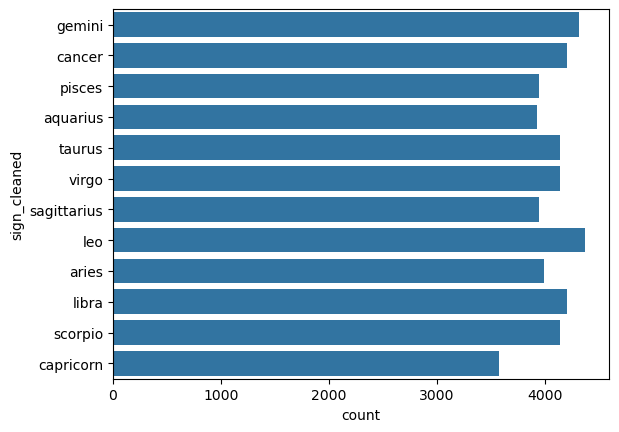

In [320]:
profiles['sign_cleaned'] = profiles.sign.str.split().str.get(0)
sns.countplot(y = 'sign_cleaned', data = profiles)

As we expected, there is a very even distribution of the astrological star signs within the dataset.

#### Body Type

<Axes: xlabel='count', ylabel='body_type'>

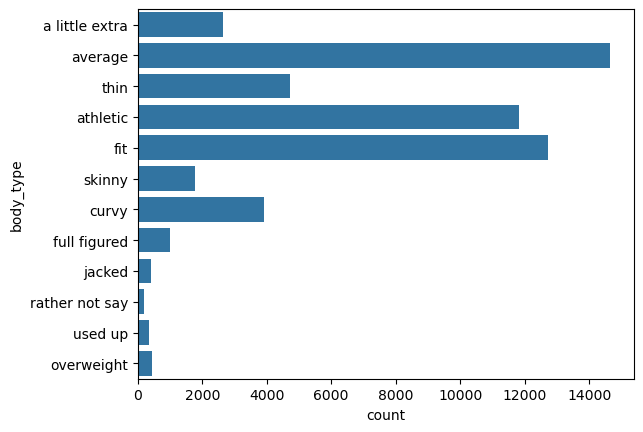

In [323]:
sns.countplot(y = 'body_type', data=profiles)

We see that most people were average, fit or athletic body types.

#### Diet

<Axes: xlabel='count', ylabel='diet'>

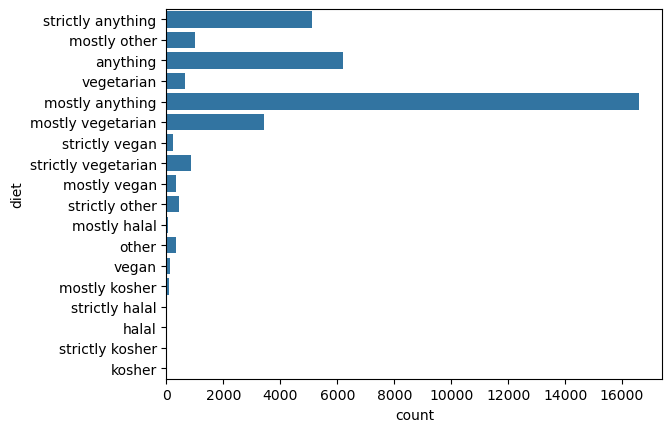

In [327]:
sns.countplot(y = 'diet', data = profiles)

We see that most people don't have a strict diet, with majority of people having a diet of 'mostly anything'

### Continous Variables

#### Age

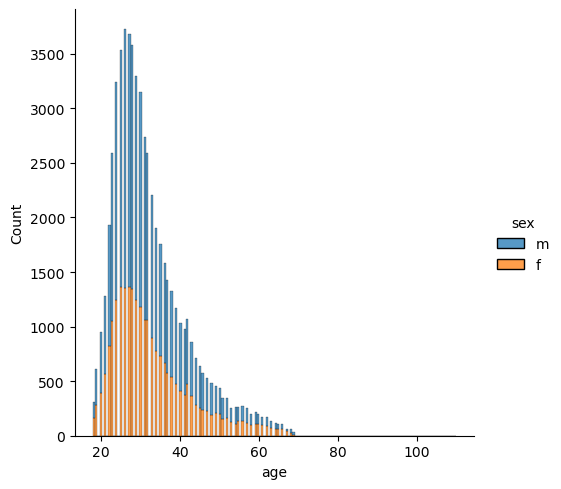

In [334]:
sns.displot(x = 'age', data = profiles, kind = 'hist', hue = 'sex', multiple = 'stack')

We see that most people are in their late 20s to early 30s. Also, the shape of the distribution for males and females is fairly similiar

#### Income

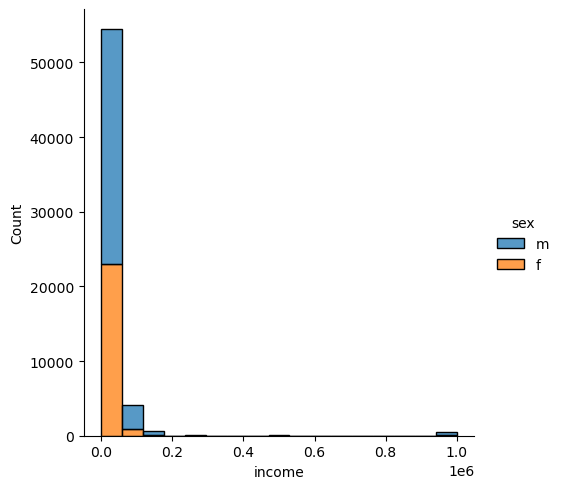

In [338]:
sns.displot(x = 'income', data = profiles, kind = 'hist', multiple = 'stack', hue = 'sex')

Most people haven't inputted the income, so this variable won't be of much use to us.

## 3. Modelling the Data

Now we have looked throught the data and chosen our outcome feature, we need to choose an appropriate model for our data, and the features we are going to model it on.
We will predict the outcomes of the dogs and cats seperately

In [362]:
print(profiles.pets_dogs.value_counts())
print(profiles.pets_cats.value_counts())

pets_dogs
likes dogs       28380
has dogs          8493
dislikes dogs      561
Name: count, dtype: int64
pets_cats
likes cats       18450
has cats          7274
dislikes cats     2899
Name: count, dtype: int64


We can see that we have a fairly large class imbalance for both of the outcomes, so we need to pick an algorithm that can handle this well. 
Tree based algorithms can handle class imbalances well as it is a predictive modelling approach and can learn from all classes of the outcomes.


We need to choose the features that will be the best predictors for the pets preferences


### Predicting Dog Preferences

In [366]:
cols = ['diet', 'orientation', 'job', 'religion_cleaned', 'sign_cleaned','sex', 'pets_dogs']

df = profiles[cols].dropna()
df.shape

(15954, 7)

In [368]:
df = pd.get_dummies(df,columns = ['diet', 'orientation', 'job', 'religion_cleaned', 'sign_cleaned','sex'])
df.head()

,pets_dogs,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,...,sign_cleaned_gemini,sign_cleaned_leo,sign_cleaned_libra,sign_cleaned_pisces,sign_cleaned_sagittarius,sign_cleaned_scorpio,sign_cleaned_taurus,sign_cleaned_virgo,sex_f,sex_m
0,likes dogs,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,likes dogs,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
7,likes dogs,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
9,likes dogs,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
14,likes dogs,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Now that we have created our dummy variables, we can split the data into training and test sets.

               precision    recall  f1-score   support

dislikes dogs       0.08      0.06      0.07        53
     has dogs       0.23      0.23      0.23       685
   likes dogs       0.77      0.78      0.77      2453

     accuracy                           0.65      3191
    macro avg       0.36      0.36      0.36      3191
 weighted avg       0.64      0.65      0.65      3191



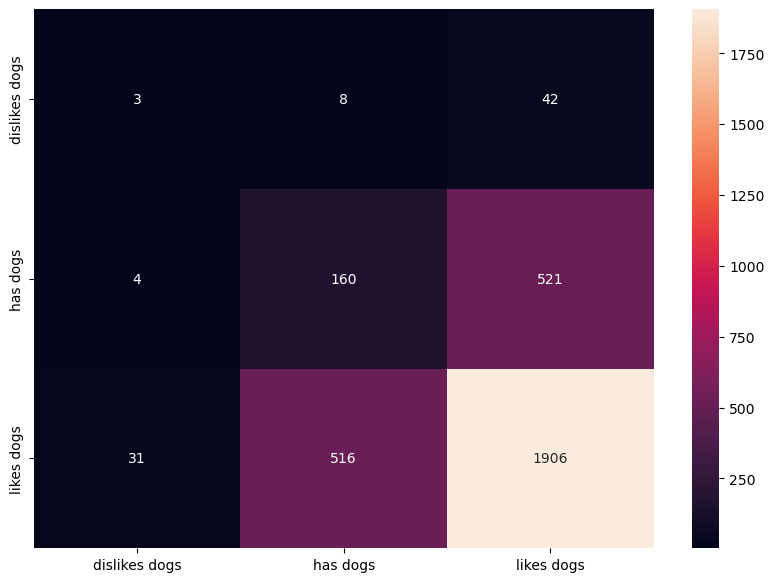

In [424]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 1:len(df.columns)]
y = df.iloc[:,0]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 4)


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

tree = DecisionTreeClassifier(random_state = 4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)

print(classification_report(y_val, y_pred))


confusion = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax,fmt="d")
ax.set_xticklabels(tree.classes_)
ax.set_yticklabels(tree.classes_)
plt.show()

In the above code, we have fit the data to a decision tree classifier and calculated the evaluation metrics using the validation set.
We observe that we have a 65% overall accurcay, but our precision, recall and f1 score are low for 'dislikes dogs' classification. 

This is a result of the class imbalance we have.

In [419]:
tree.get_depth()

50

The tree has a depth of 50, which can result in overfitting of the data, so it won't generalize well to other data.
So we are going to try and tune this hyperparameter and hopefully increase our model's accuracy

In [442]:
depths = {'max_depth' : range(10,51)}


from sklearn.model_selection import GridSearchCV
tree = DecisionTreeClassifier(random_state = 4)

grid = GridSearchCV(estimator = tree, param_grid = depths)
grid.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=4),
             param_grid={'max_depth': range(10, 51)})

In [444]:
print(f"Best Tree Parameters : {grid.best_params_}")

Best Tree Parameters : {'max_depth': 10}


From the grid search, we find that the algorithm finds that a max depth of 10 if the most accurate out of our chosen depths.

In [454]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 4)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)
print(classification_report(y_val, y_pred))


               precision    recall  f1-score   support

dislikes dogs       0.43      0.06      0.10        53
     has dogs       0.25      0.02      0.04       685
   likes dogs       0.77      0.98      0.86      2453

     accuracy                           0.76      3191
    macro avg       0.48      0.35      0.33      3191
 weighted avg       0.65      0.76      0.67      3191



Now, our accuracy has increased to 76%, while some of our other metrics have increaed which is a good sign.

### Cats

Now we will complete the same process to predict users cat preferences.

In [459]:
cols = ['diet', 'orientation', 'job', 'religion_cleaned', 'sign_cleaned','sex', 'pets_cats']

df = profiles[cols].dropna()
df.shape

(12869, 7)

In [461]:
df = pd.get_dummies(df,columns = ['diet', 'orientation', 'job', 'religion_cleaned', 'sign_cleaned','sex'])
df.head()

,pets_cats,diet_anything,diet_halal,diet_kosher,diet_mostly anything,diet_mostly halal,diet_mostly kosher,diet_mostly other,diet_mostly vegan,diet_mostly vegetarian,...,sign_cleaned_gemini,sign_cleaned_leo,sign_cleaned_libra,sign_cleaned_pisces,sign_cleaned_sagittarius,sign_cleaned_scorpio,sign_cleaned_taurus,sign_cleaned_virgo,sex_f,sex_m
0,likes cats,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
1,likes cats,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
5,likes cats,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
7,likes cats,False,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
9,likes cats,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


               precision    recall  f1-score   support

dislikes cats       0.17      0.17      0.17       308
     has cats       0.28      0.27      0.27       591
   likes cats       0.66      0.66      0.66      1675

     accuracy                           0.52      2574
    macro avg       0.37      0.37      0.37      2574
 weighted avg       0.51      0.52      0.51      2574



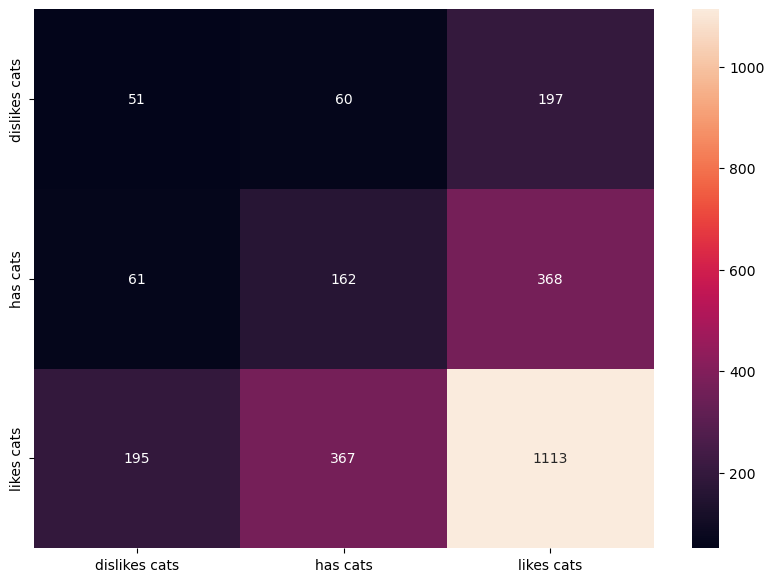

In [472]:

X = df.iloc[:, 1:len(df.columns)]
y = df.iloc[:,0]

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.2, random_state = 4)



tree = DecisionTreeClassifier(random_state = 4)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)

print(classification_report(y_val, y_pred))


confusion = confusion_matrix(y_val, y_pred)

plt.figure(figsize=(10,7))

ax= plt.subplot()
sns.heatmap(confusion, annot=True, ax = ax,fmt="d")
ax.set_xticklabels(tree.classes_)
ax.set_yticklabels(tree.classes_)
plt.show()





We see an initial accuracy of 52%, which is lower than the accuracy for dogs.

This could be a result from there being a smaller class imbalance for the cat preferences, since there are fewer cases of 'likes cats' overall, but the algorithm is still classifing many cases into that category.

Again, we have a very large tree depth, which results in overfitting of the data

In [470]:
print(tree.get_depth())

51


depths = {'max_depth' : range(10,51)}



tree = DecisionTreeClassifier(random_state = 4)

grid = GridSearchCV(estimator = tree, param_grid = depths)
grid.fit(X_train, y_train)

In [477]:
print(f"Best Tree Parameters : {grid.best_params_}")

Best Tree Parameters : {'max_depth': 10}


In [479]:
tree = DecisionTreeClassifier(max_depth = 10, random_state = 4)
tree.fit(X_train, y_train)

y_pred = tree.predict(X_val)
print(classification_report(y_val, y_pred))

               precision    recall  f1-score   support

dislikes cats       0.26      0.04      0.06       308
     has cats       0.32      0.04      0.08       591
   likes cats       0.65      0.96      0.78      1675

     accuracy                           0.64      2574
    macro avg       0.41      0.35      0.31      2574
 weighted avg       0.53      0.64      0.53      2574



After using the grid search algotithm , we arrive at an accuracy of 64%

## Conclusion

In this project, I have attempted to predict the pet preferences of the user of OK Cupid using their inputted information. For our dataset, we obtained accuracies of 76% and 64% for dog and cat preferences respectively. However, this algorithm is highly overfitting the data and lack of generalizabilty of the model, which may lead to inaccurate results with other data, and asks the question of if it is actually possible to predict these outocmes with the given data.

Also, one assumption that i made could be slightly ambiguous - that the preference of cats and dogs are independent of each other and do not affect each other, which may impact the results of this project, since we did not use them together in the modelling stage.

## Future

To make these predictions more accurate, we would potentially need to tune the model hyperparamters better, or experiment with different models to see of they can predict the outcomes any better.